In [2]:
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

# Archivos
import urllib.request
import glob

# Análisis de sonido
import spotipy 

# Machine learning
# importar los paquetes para clustering
from sklearn.preprocessing import StandardScaler

# Trabajo Práctico 1



## Carga metadata y audio_features

In [3]:
metadata = pd.read_csv('data/metadata.csv', index_col='id')
audio_features = pd.read_csv('data/audio_features.csv', index_col='id')

In [4]:
metadata.head()

album  \
id                                                                          
5i2sgqnzaxYpvXmGAB592h  {'album_type': 'ALBUM', 'artists': [{'external...   
4mGzm5ahHxMX5IhVWbU7cl  {'album_type': 'ALBUM', 'artists': [{'external...   
4DEn3hZzSs9MFwFNDla5Y5  {'album_type': 'ALBUM', 'artists': [{'external...   
5P6vo51dtkBYWXswH1twvK  {'album_type': 'ALBUM', 'artists': [{'external...   
29TZQMVLv25CBm3bYn2EIQ  {'album_type': 'ALBUM', 'artists': [{'external...   

                             artists  \
id                                     
5i2sgqnzaxYpvXmGAB592h     Stan Getz   
4mGzm5ahHxMX5IhVWbU7cl   Nina Simone   
4DEn3hZzSs9MFwFNDla5Y5   Chick Corea   
5P6vo51dtkBYWXswH1twvK  Snarky Puppy   
29TZQMVLv25CBm3bYn2EIQ    Sam Rivers   

                                                        available_markets  \
id                                                                          
5i2sgqnzaxYpvXmGAB592h                                                 []   
4mGzm5ahHxMX5IhVWbU7cl                                                 []   
4DEn3hZzSs9MFwFNDla5Y5  ['AD', 'AE', 'AR', 'AT', 'BE', 'BO', 'BR', 'CA...   
5P6vo51dtkBYWXswH1twvK                                                 []   
29TZQMVLv25CBm3bYn2EIQ  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   

                        disc_number  duration_ms  explicit  \
id                                                           
5i2sgqnzaxYpvXmGAB592h            1       253933     False   
4mGzm5ahHxMX5IhVWbU7cl            1       249823     False   
4DEn3hZzSs9MFwFNDla5Y5            1       185826     False   
5P6vo51dtkBYWXswH1twvK            1       645893     False   
29TZQMVLv25CBm3bYn2EIQ            1       326400     False   

                                    external_ids  \
id                                                 
5i2sgqnzaxYpvXmGAB592h  {'isrc': 'USPR36307074'}   
4mGzm5ahHxMX5IhVWbU7cl  {'isrc': 'QMSGD1370010'}   
4DEn3hZzSs9MFwFNDla5Y5  {'isrc': 'USC4R0303698'}   
5P6vo51dtkBYWXswH1twvK  {'isrc': 'US8JA1411008'}   
29TZQMVLv25CBm3bYn2EIQ  {'isrc': 'USBN20100519'}   

                                                            external_urls  \
id                                                                          
5i2sgqnzaxYpvXmGAB592h  {'spotify': 'https://open.spotify.com/track/5i...   
4mGzm5ahHxMX5IhVWbU7cl  {'spotify': 'https://open.spotify.com/track/4m...   
4DEn3hZzSs9MFwFNDla5Y5  {'spotify': 'https://open.spotify.com/track/4D...   
5P6vo51dtkBYWXswH1twvK  {'spotify': 'https://open.spotify.com/track/5P...   
29TZQMVLv25CBm3bYn2EIQ  {'spotify': 'https://open.spotify.com/track/29...   

                                                                     href  \
id                                                                          
5i2sgqnzaxYpvXmGAB592h  https://api.spotify.com/v1/tracks/5i2sgqnzaxYp...   
4mGzm5ahHxMX5IhVWbU7cl  https://api.spotify.com/v1/tracks/4mGzm5ahHxMX...   
4DEn3hZzSs9MFwFNDla5Y5  https://api.spotify.com/v1/tracks/4DEn3hZzSs9M...   
5P6vo51dtkBYWXswH1twvK  https://api.spotify.com/v1/tracks/5P6vo51dtkBY...   
29TZQMVLv25CBm3bYn2EIQ  https://api.spotify.com/v1/tracks/29TZQMVLv25C...   

                        is_local                                     name  \
id                                                                          
5i2sgqnzaxYpvXmGAB592h     False  Corcovado - Quiet Nights Of Quiet Stars   
4mGzm5ahHxMX5IhVWbU7cl     False                        I Loves You Porgy   
4DEn3hZzSs9MFwFNDla5Y5     False                 Swedish Landscape - Live   
5P6vo51dtkBYWXswH1twvK     False                                   Lingus   
29TZQMVLv25CBm3bYn2EIQ     False                             Kinda Dukish   

                        popularity preview_url  track_number   type  \
id                                                                    
5i2sgqnzaxYpvXmGAB592h          12         NaN             5  track   
4mGzm5ahHxMX5IhVWbU7cl           6         NaN            10  track   
4DE

In [5]:
metadata.dtypes

album                object
artists              object
available_markets    object
disc_number           int64
duration_ms           int64
explicit               bool
external_ids         object
external_urls        object
href                 object
is_local               bool
name                 object
popularity            int64
preview_url          object
track_number          int64
type                 object
uri                  object
genre                object
dtype: object

Con los datos de *metadata*, separar las etiquetas que se podrán utilizar para la validación externa (Artista, Álbum, Género), de los campos que no utilizarán en este TP.

In [4]:
# Ver cómo hacer para extraer el release_date del JSON de album
metadata_reduced = metadata[['artists', 'album', 'genre']]

In [12]:
metadata_reduced.head()

artists  \
id                                     
5i2sgqnzaxYpvXmGAB592h     Stan Getz   
4mGzm5ahHxMX5IhVWbU7cl   Nina Simone   
4DEn3hZzSs9MFwFNDla5Y5   Chick Corea   
5P6vo51dtkBYWXswH1twvK  Snarky Puppy   
29TZQMVLv25CBm3bYn2EIQ    Sam Rivers   

                                                                    album  \
id                                                                          
5i2sgqnzaxYpvXmGAB592h  {'album_type': 'ALBUM', 'artists': [{'external...   
4mGzm5ahHxMX5IhVWbU7cl  {'album_type': 'ALBUM', 'artists': [{'external...   
4DEn3hZzSs9MFwFNDla5Y5  {'album_type': 'ALBUM', 'artists': [{'external...   
5P6vo51dtkBYWXswH1twvK  {'album_type': 'ALBUM', 'artists': [{'external...   
29TZQMVLv25CBm3bYn2EIQ  {'album_type': 'ALBUM', 'artists': [{'external...   

                       genre  
id                            
5i2sgqnzaxYpvXmGAB592h  jazz  
4mGzm5ahHxMX5IhVWbU7cl  jazz  
4DEn3hZzSs9MFwFNDla5Y5  jazz  
5P6vo51dtkBYWXswH1twvK  jazz  
29TZQMVLv25CBm3bYn2EIQ  jazz

In [13]:
metadata_reduced['album'][0]

"{'album_type': 'ALBUM', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0FMucZsEnCxs5pqBjHjIc8'}, 'href': 'https://api.spotify.com/v1/artists/0FMucZsEnCxs5pqBjHjIc8', 'id': '0FMucZsEnCxs5pqBjHjIc8', 'name': 'Stan Getz', 'type': 'artist', 'uri': 'spotify:artist:0FMucZsEnCxs5pqBjHjIc8'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/77ZUbcdoU5KCPHNUl8bgQy'}, 'href': 'https://api.spotify.com/v1/artists/77ZUbcdoU5KCPHNUl8bgQy', 'id': '77ZUbcdoU5KCPHNUl8bgQy', 'name': 'João Gilberto', 'type': 'artist', 'uri': 'spotify:artist:77ZUbcdoU5KCPHNUl8bgQy'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'P

In [5]:
metadata['genre'].value_counts()

world-music      463
ambient          460
drum-and-bass    451
jazz             427
classical        405
Name: genre, dtype: int64

In [15]:
audio_features.dtypes

acousticness        float64
analysis_url         object
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
track_href           object
type                 object
uri                  object
valence             float64
dtype: object

In [16]:
audio_features.head()

acousticness  \
id                                     
5i2sgqnzaxYpvXmGAB592h         0.957   
4mGzm5ahHxMX5IhVWbU7cl         0.953   
4DEn3hZzSs9MFwFNDla5Y5         0.989   
5P6vo51dtkBYWXswH1twvK         0.174   
29TZQMVLv25CBm3bYn2EIQ         0.436   

                                                             analysis_url  \
id                                                                          
5i2sgqnzaxYpvXmGAB592h  https://api.spotify.com/v1/audio-analysis/5i2s...   
4mGzm5ahHxMX5IhVWbU7cl  https://api.spotify.com/v1/audio-analysis/4mGz...   
4DEn3hZzSs9MFwFNDla5Y5  https://api.spotify.com/v1/audio-analysis/4DEn...   
5P6vo51dtkBYWXswH1twvK  https://api.spotify.com/v1/audio-analysis/5P6v...   
29TZQMVLv25CBm3bYn2EIQ  https://api.spotify.com/v1/audio-analysis/29TZ...   

                        danceability  duration_ms  energy  instrumentalness  \
id                                                                            
5i2sgqnzaxYpvXmGAB592h         0.524       253933  0.1080          0.001230   
4mGzm5ahHxMX5IhVWbU7cl         0.480       249823  0.0322          0.000004   
4DEn3hZzSs9MFwFNDla5Y5         0.394       185827  0.1500          0.908000   
5P6vo51dtkBYWXswH1twvK         0.461       645894  0.7730          0.702000   
29TZQMVLv25CBm3bYn2EIQ         0.452       326400  0.5010          0.900000   

                        key  liveness  loudness  mode  speechiness    tempo  \
id                                                                            
5i2sgqnzaxYpvXmGAB592h    0     0.139   -18.361     1       0.0493  127.982   
4mGzm5ahHxMX5IhVWbU7cl    4     0.098   -23.781     1       0.0604  121.766   
4DEn3hZzSs9MFwFNDla5Y5    5     0.342   -21.133     0       0.0353   97.738   
5P6vo51dtkBYWXswH1twvK    9     0.692   -10.316     0       0.1470  130.109   
29TZQMVLv25CBm3bYn2EIQ   10     0.110   -13.149     0       0.0329  111.203   

                        time_signature  \
id                                       
5i2sgqnzaxYpvXmGAB592h               4   
4mGzm5ahHxMX5IhVWbU7cl               4   
4DEn3hZzSs9MFwFNDla5Y5               3   
5P6vo51dtkBYWXswH1twvK               5   
29TZQMVLv25CBm3bYn2EIQ               4   

                                                               track_href  \
id                                                                          
5i2sgqnzaxYpvXmGAB592h  https://api.spotify.com/v1/tracks/5i2sgqnzaxYp...   
4mGzm5ahHxMX5IhVWbU7cl  https://api.spotify.com/v1/tracks/4mGzm5ahHxMX...   
4DEn3hZzSs9MFwFNDla5Y5  https://api.spotify.com/v1/tracks/4DEn3hZzSs9M...   
5P6vo51dtkBYWXswH1twvK  https://api.spotify.com/v1/tracks/5P6vo51dtkBY...   
29TZQMVLv25CBm3bYn2EIQ  https://api.spotify.com/v1/tracks/29TZQMVLv25C...   

                                  type                                   uri  \
id                                                                             
5i2sgqnzaxYpvXmGAB592h  audio_features  spotify:track:5i2sgqnzaxYpvXmGAB592h   
4mGzm5ahHxMX5IhVWbU7cl  audio_features  spotify:track:4mGzm5ahHxMX5IhVWbU7cl   
4DEn3hZzSs9MFwFNDla5Y5  audio_features  spotify:track:4DEn3hZzSs9MFwFNDla5Y5   
5P6vo51dtkBYWXswH1twvK  audio_features  spotify:track:5P6vo51dtkBYWXswH1twvK   
29TZQMVLv25CBm3bYn2EIQ  audio_features  spotify:track:29TZQMVLv25CBm3bYn2EIQ   

                        valence  
id                               
5i2sgqnzaxYpvXmGAB592h    0.322  
4mGzm5ahHxMX5IhVWbU7cl    0.172  
4DEn3hZzSs9MFwFNDla5Y5    0.170  
5P6vo51dtkBYWXswH1twvK    0.488  
29TZQMVLv25CBm3bYn2EIQ    0.602

Con los datos de *audio_features*, generar un gráfico tipo *scatter matrix*.

In [5]:
audio_features_reduced = audio_features[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]

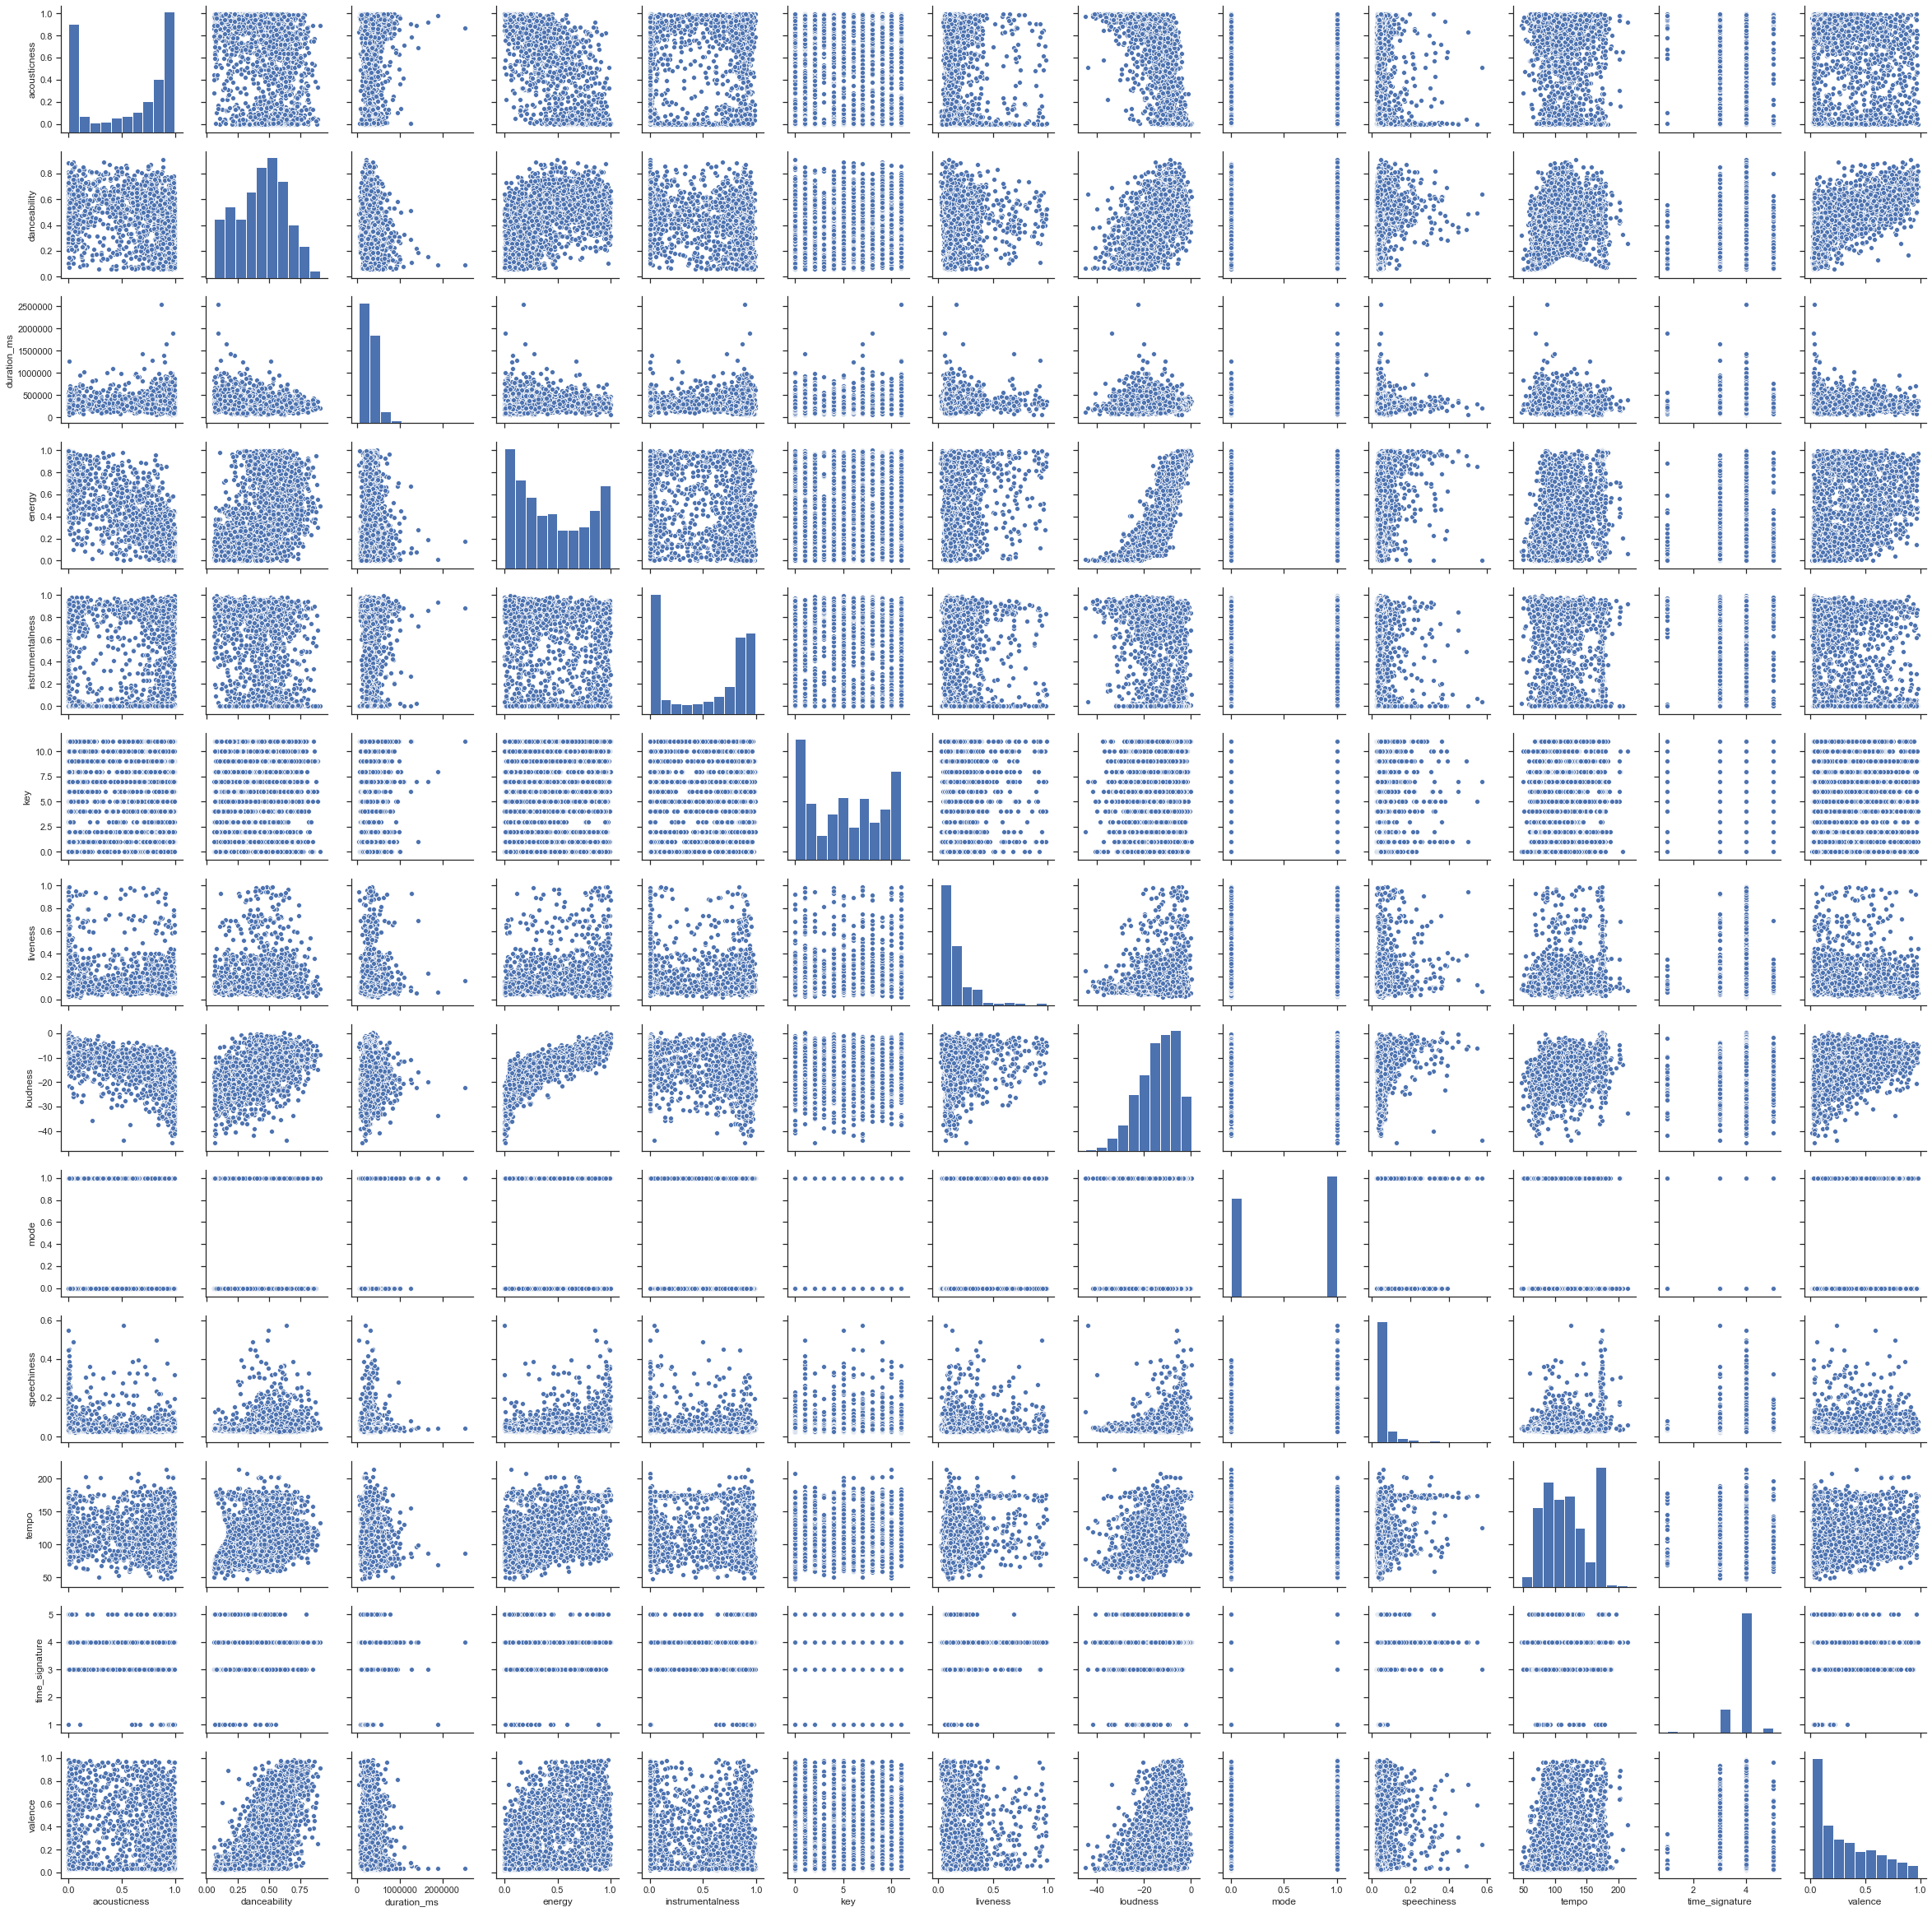

In [6]:
sns.set(style="ticks")
sns.pairplot(audio_features_reduced)


In [9]:
#matriz de correlación
audio_features_reduced.corr()

acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.335133    -0.015911 -0.833011   
danceability         -0.335133      1.000000    -0.197828  0.449575   
duration_ms          -0.015911     -0.197828     1.000000 -0.047300   
energy               -0.833011      0.449575    -0.047300  1.000000   
instrumentalness      0.199828     -0.367129     0.143622 -0.274126   
key                  -0.116889      0.062255     0.017797  0.116940   
liveness             -0.241074      0.034854     0.035349  0.285643   
loudness             -0.716542      0.499977    -0.058933  0.866154   
mode                  0.082901     -0.030575     0.004850 -0.102209   
speechiness          -0.254333      0.177873    -0.045162  0.304040   
tempo                -0.483857      0.229456    -0.046465  0.541612   
time_signature       -0.172753      0.210029    -0.021428  0.188939   
valence              -0.206942      0.680345    -0.190217  0.399903   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.199828 -0.116889 -0.241074 -0.716542  0.082901   
danceability             -0.367129  0.062255  0.034854  0.499977 -0.030575   
duration_ms               0.143622  0.017797  0.035349 -0.058933  0.004850   
energy                   -0.274126  0.116940  0.285643  0.866154 -0.102209   
instrumentalness          1.000000 -0.043105 -0.083062 -0.381098  0.033175   
key                      -0.043105  1.000000  0.053645  0.095363 -0.173560   
liveness                 -0.083062  0.053645  1.000000  0.229684 -0.025787   
loudness                 -0.381098  0.095363  0.229684  1.000000 -0.084524   
mode                      0.033175 -0.173560 -0.025787 -0.084524  1.000000   
speechiness              -0.153158  0.070067  0.185036  0.218152  0.000463   
tempo                    -0.087814  0.048894  0.159391  0.481935 -0.067941   
time_signature           -0.115315  0.015061  0.036049  0.189274 -0.062538   
valence                  -0.417827  0.046637  0.058733  0.409778 -0.037288   

                  speechiness     tempo  time_signature   valence  
acousticness        -0.254333 -0.483857       -0.172753 -0.206942  
danceability         0.177873  0.229456        0.210029  0.680345  
duration_ms         -0.045162 -0.046465       -0.021428 -0.190217  
energy               0.304040  0.541612        0.188939  0.399903  
instrumentalness    -0.153158 -0.087814       -0.115315 -0.417827  
key                  0.070067  0.048894        0.015061  0.046637  
liveness             0.185036  0.159391        0.036049  0.058733  
loudness             0.218152  0.481935        0.189274  0.409778  
mode                 0.000463 -0.067941       -0.062538 -0.037288  
speechiness          1.000000  0.201080        0.065076  0.146733  
tempo                0.201080  1.000000        0.089024  0.142934  
time_signature       0.065076  0.089024        1.000000  0.148285  
valence              0.146733  0.142934        0.148285  1.000000

In [17]:
#features de tipo factor key, mode, time_signature
#audio_features_reduced.key.hist()
audio_features_reduced.time_signature



id
5i2sgqnzaxYpvXmGAB592h    4
4mGzm5ahHxMX5IhVWbU7cl    4
4DEn3hZzSs9MFwFNDla5Y5    3
5P6vo51dtkBYWXswH1twvK    5
29TZQMVLv25CBm3bYn2EIQ    4
4cUgsvo0xRu0JQXIhxcXkZ    4
6gkIIBgZx2661g01Nz5Qtr    4
2uwWxQaPESir0zpeVcHRvC    4
57FfMOh9wOQ7IDDK2tmigg    4
5P7QtBWllP1CQno3Bi834D    4
6bZf2VcN25Hu7jcLNkc5NC    4
3qQVUOHJdgIFWJd0jrG9GE    4
6dZKWYSx5YBIme4SfpIHJ0    4
54zMkQWwYLKTAx2qIkl45X    4
0U070HY5rBmCyh4SIWHrgN    4
7JtcCde09fsajDNHmPFrX7    4
56IF1gMvIEOQeSCWoMT7hx    4
3kOW7LYkOXJ9qE05TlKVc3    4
7MrXwqdwwU57JqIOGtTbRe    4
4LInRUJ6XN1TVnoRVAFcdB    4
7IPEQ3ScOp9cAd3dC7JvDn    4
0TYaiwJB9eLNew2VYxF6i8    4
1gHdnVaBNakuVxPY16Mx6a    4
70Va8NA2Ies98TNa1XuNbl    4
21WlpZiXLelHjdoMUhHfrm    4
14FkDSrkQPko4YMhx6dLI2    4
44MyZZa2SPW0BO9XcmlU9F    4
354gNwpjlW9QKsMPLWdMv5    3
6f6OQJv9qjqyJq9NHin45n    4
5bV5aNKjf4YelnJQHJ5PEI    4
                         ..
3ivi15jAUt262SxGC8vQl4    4
0Zw4llKeB35SIKASy1aLtV    4
5DjNm2iw6u1rwdPWVustEx    4
6ARQSpE9Hhu2U7bZfKNRzX    3
5C0DGc7M86XqwMRPe

In [10]:
audio_features_more_reduced = audio_features[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','valence','tempo','liveness']]

danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.449575  0.499977     0.177873     -0.335133   
energy                0.449575  1.000000  0.866154     0.304040     -0.833011   
loudness              0.499977  0.866154  1.000000     0.218152     -0.716542   
speechiness           0.177873  0.304040  0.218152     1.000000     -0.254333   
acousticness         -0.335133 -0.833011 -0.716542    -0.254333      1.000000   
instrumentalness     -0.367129 -0.274126 -0.381098    -0.153158      0.199828   
valence               0.680345  0.399903  0.409778     0.146733     -0.206942   
tempo                 0.229456  0.541612  0.481935     0.201080     -0.483857   
liveness              0.034854  0.285643  0.229684     0.185036     -0.241074   

                  instrumentalness   valence     tempo  liveness  
danceability             -0.367129  0.680345  0.229456  0.034854  
energy                   -0.274126  0.399903  0.541612  0.285643  
loudness                 -0.381098  0.409778  0.481935  0.229684  
speechiness              -0.153158  0.146733  0.201080  0.185036  
acousticness              0.199828 -0.206942 -0.483857 -0.241074  
instrumentalness          1.000000 -0.417827 -0.087814 -0.083062  
valence                  -0.417827  1.000000  0.142934  0.058733  
tempo                    -0.087814  0.142934  1.000000  0.159391  
liveness                 -0.083062  0.058733  0.159391  1.000000

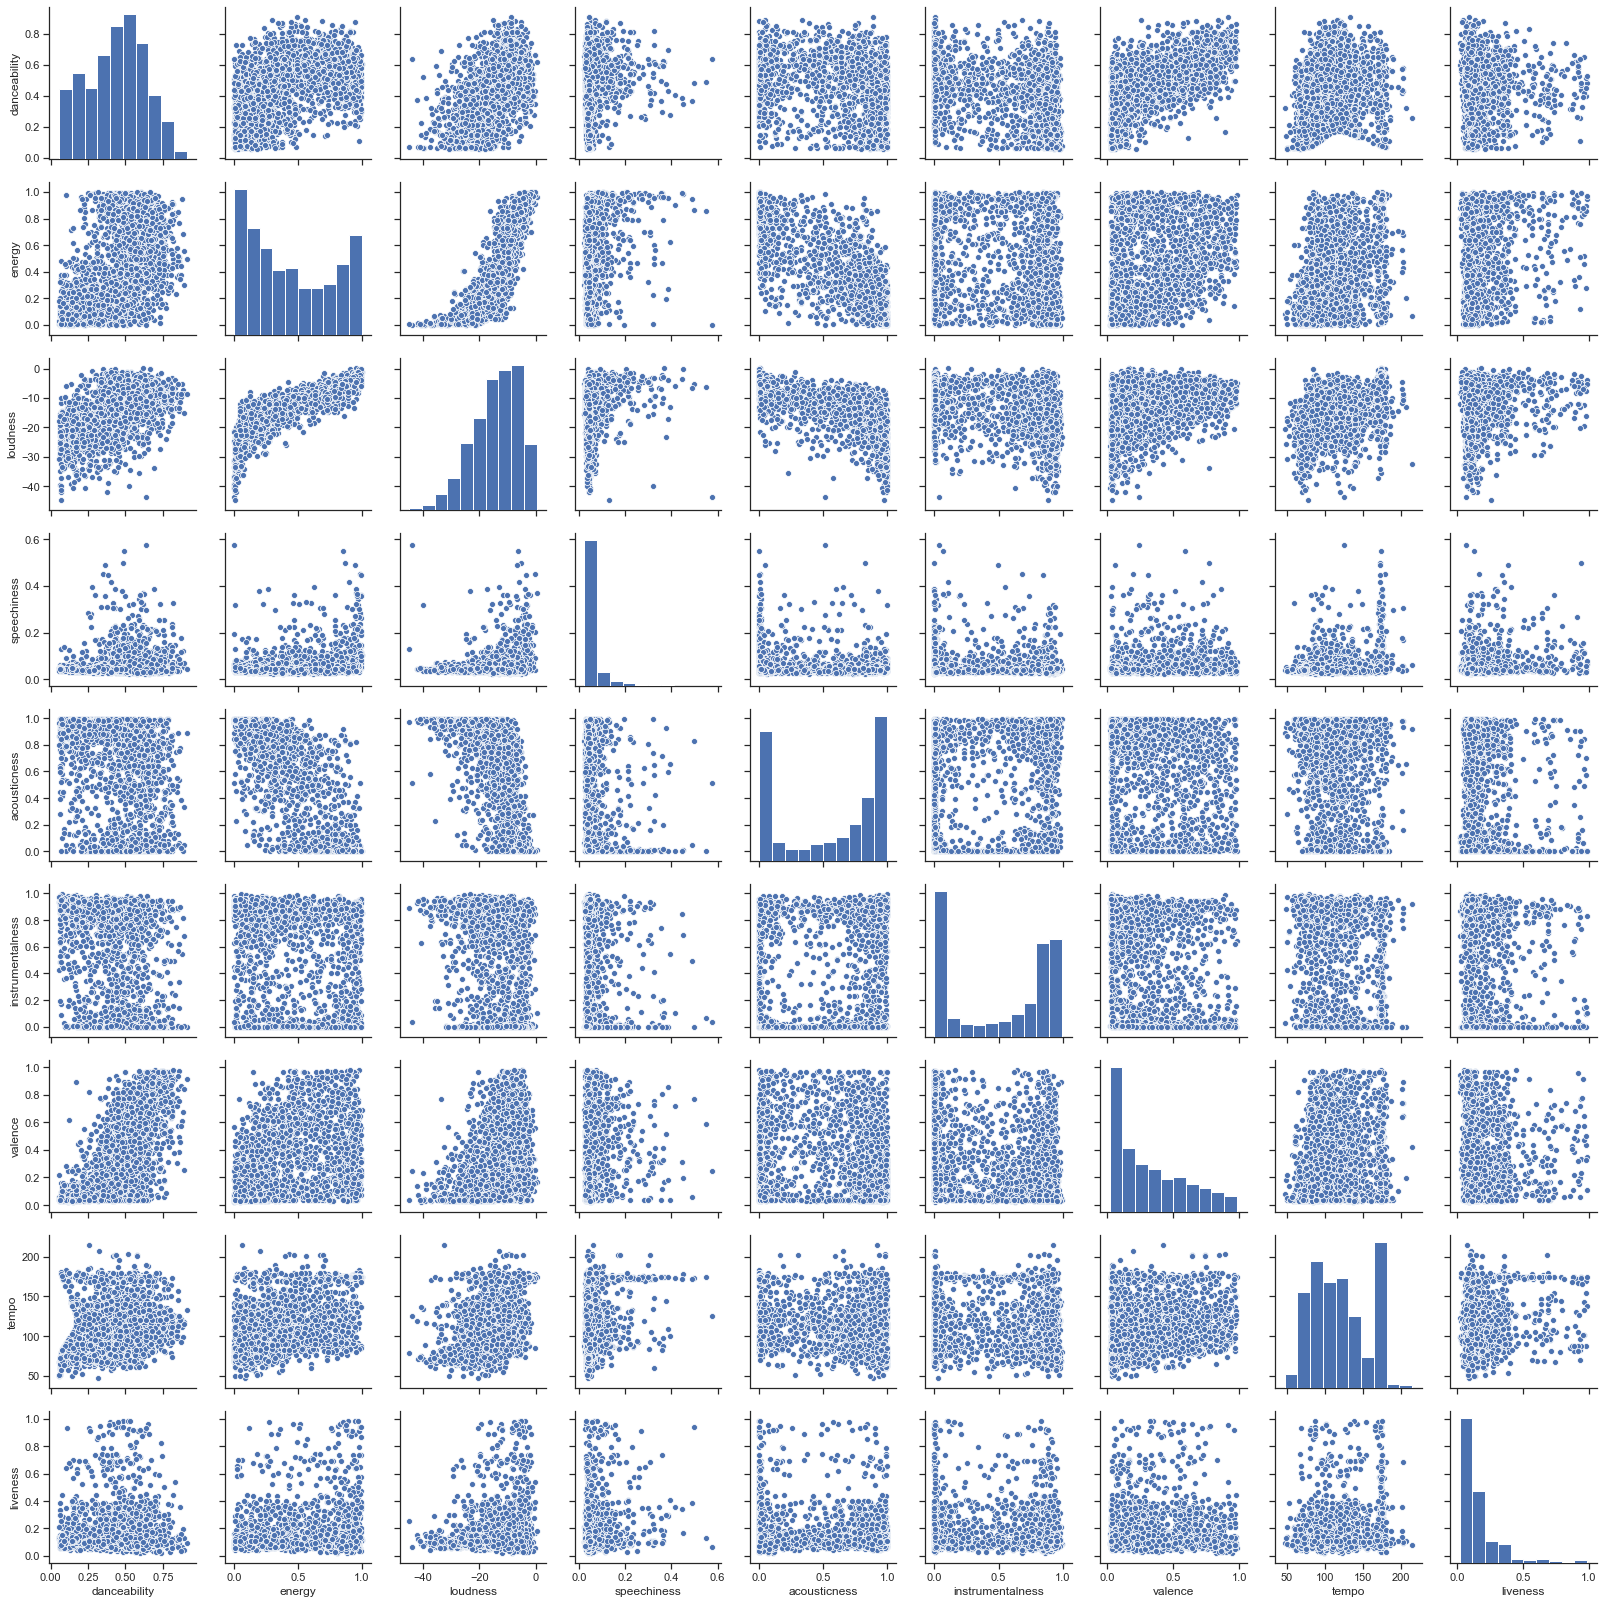

In [11]:
sns.set(style="ticks")
sns.pairplot(audio_features_more_reduced);
audio_features_more_reduced.corr()

Estandarizar y volver a generar un gráfico tipo *scatter matrix*

In [29]:
ss = StandardScaler()
audio_features_norm = pd.DataFrame(ss.fit_transform(audio_features_more_reduced))

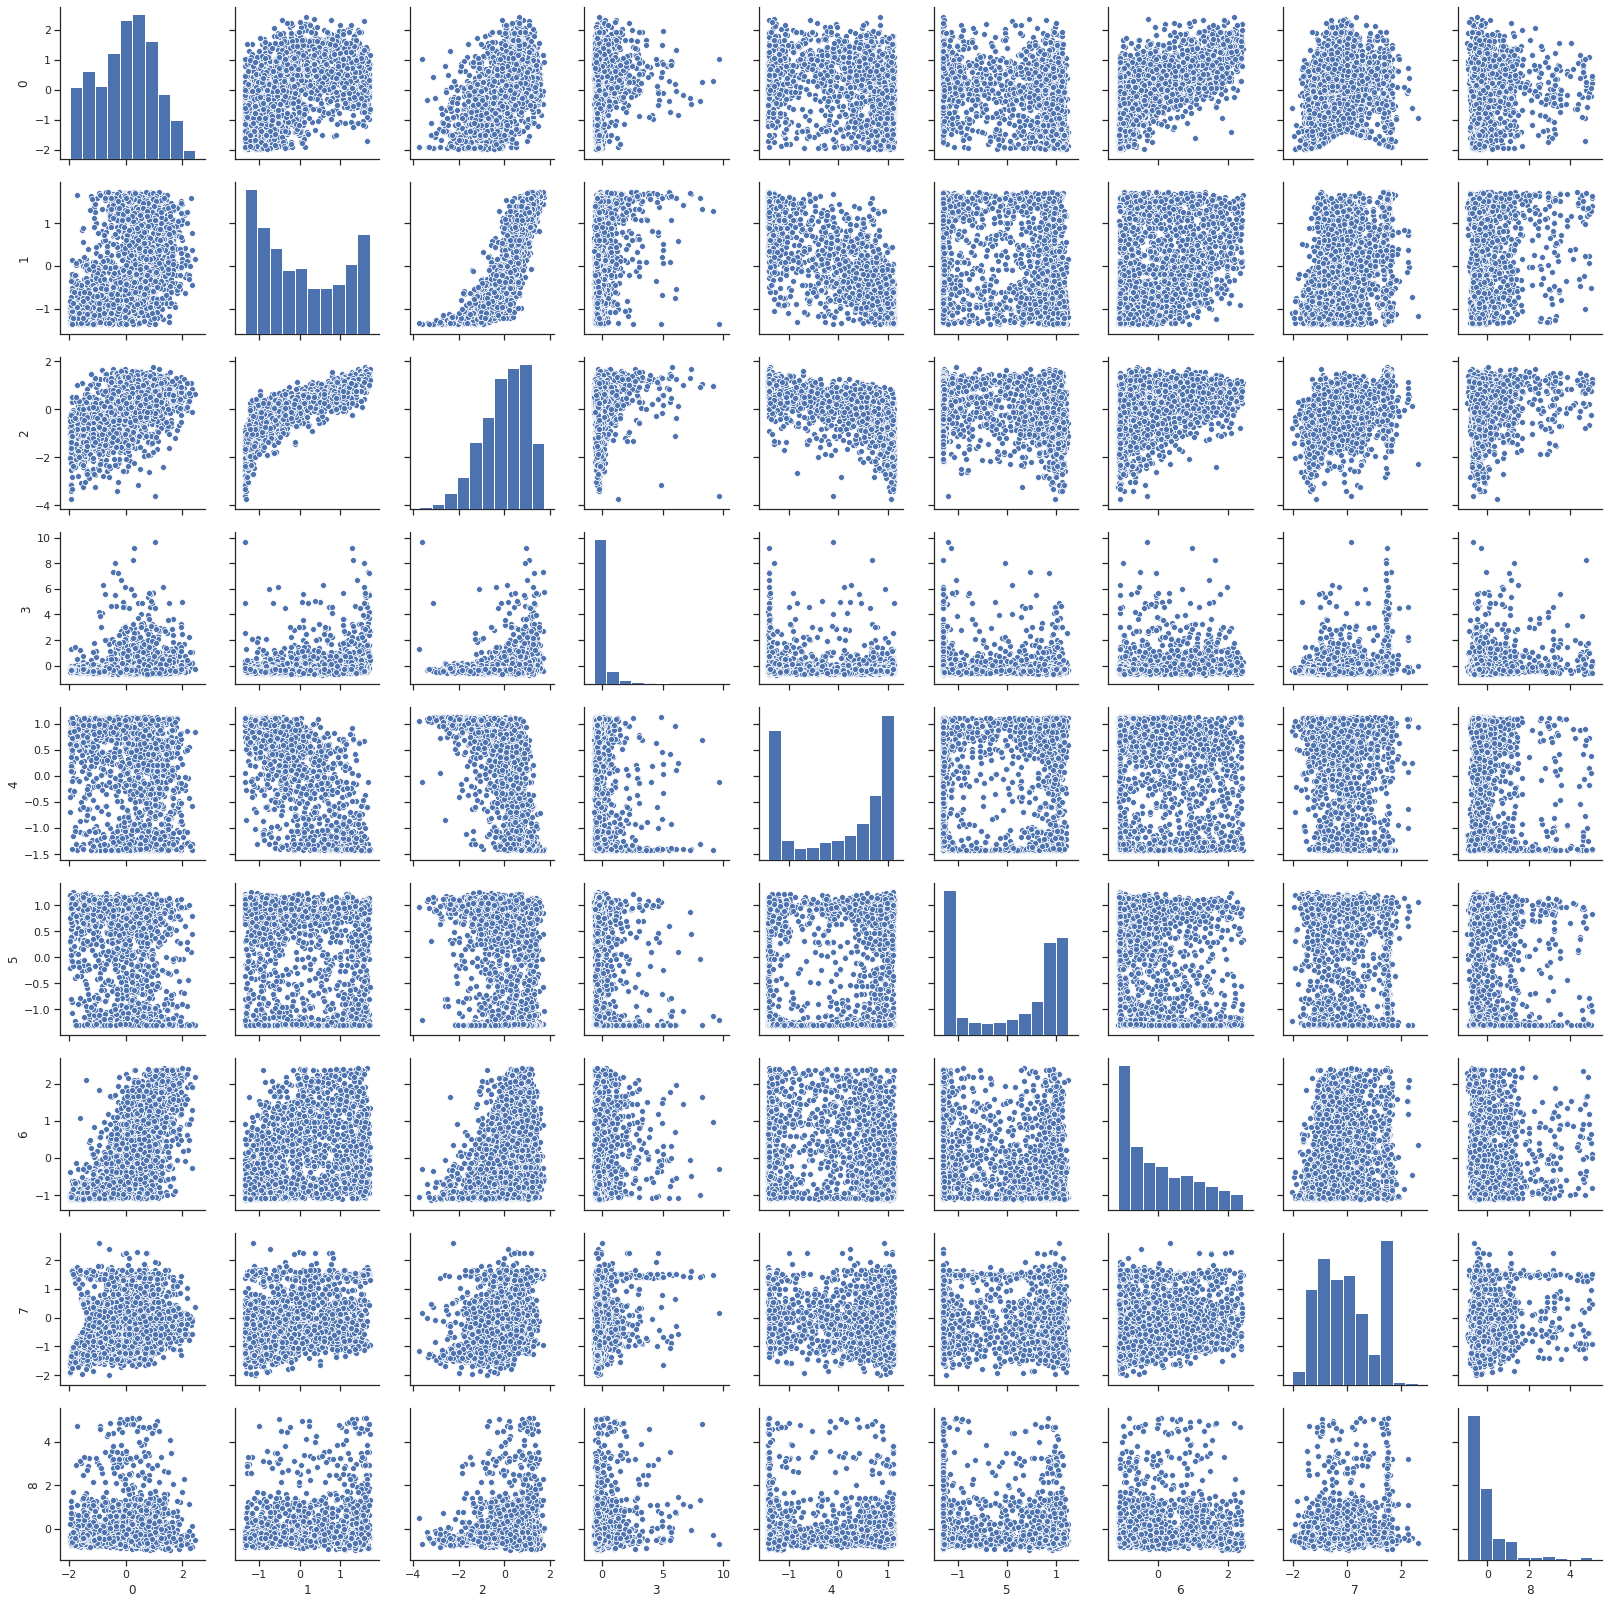

In [31]:
# Este scatter matrix da exactamente igual al anterior
# Yo creo que porque estas variables ya vienen normalizadas (entre 0 y 1) desde Spotify.
sns.set(style="ticks")
sns.pairplot(audio_features_norm);

In [32]:
ss = StandardScaler()
audio_features_norm2 = pd.DataFrame(ss.fit_transform(audio_features_reduced))

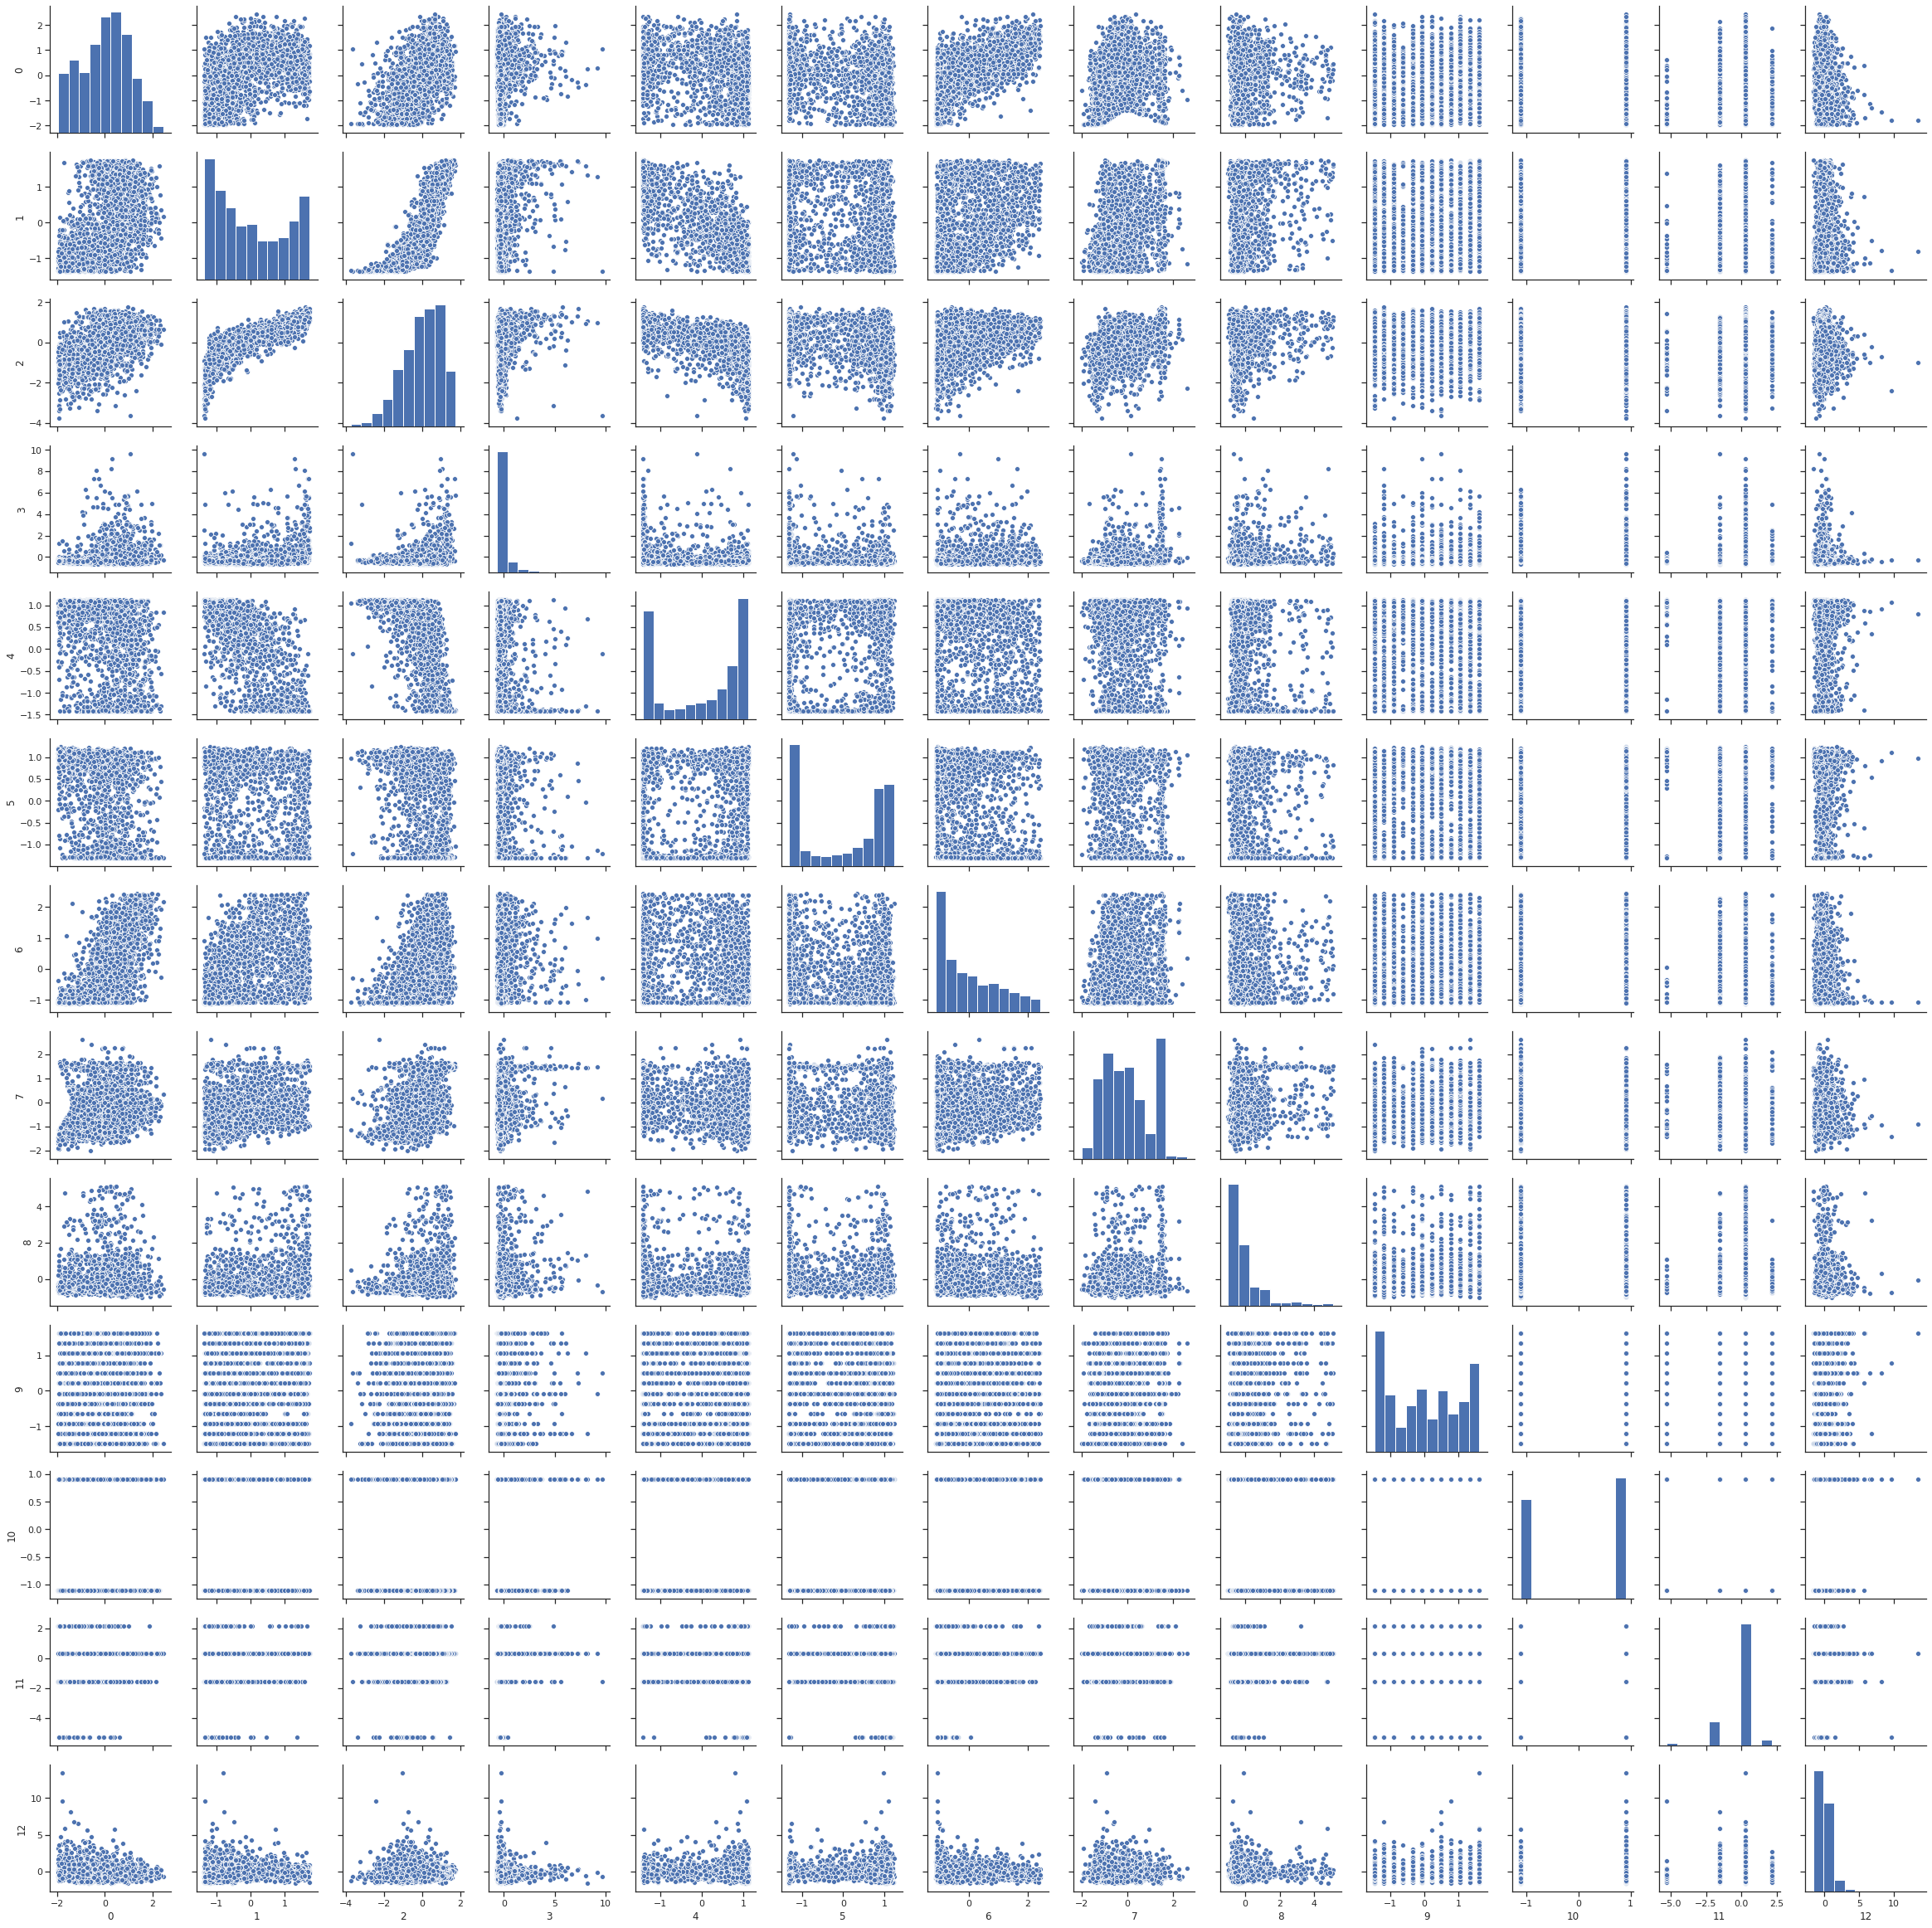

In [33]:
# Lo mismo que el anterior: la scatter matrix da igual normalizada
sns.set(style="ticks")
sns.pairplot(audio_features_norm2);

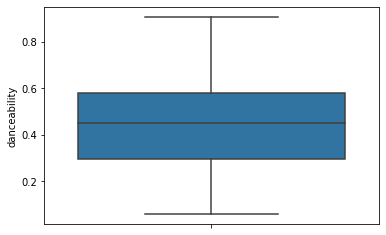

In [11]:
sns.boxplot(y='danceability', data=audio_features)

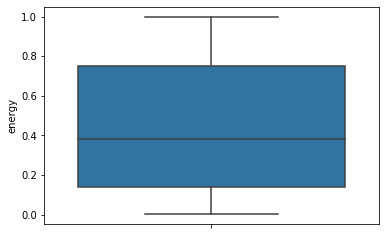

In [12]:
sns.boxplot(y='energy', data=audio_features)